# Recommendation for Android and iOS mobile apps
#### Project Summary

In this guided project, you'll work as a data analyst for a company that builds Android and iOS mobile apps. The company you work at builds mobile apps and makes them available on Google Play and the App Store.

The only apps that are built are those that are free to download and install. This means the main source of revenue consists of in-app ads. It also means revenue for any given app is mostly influenced by the number of users who use the app — the more users who see and engage with the ads, the better. The goal of this project is to analyze data to help the developers understand what type of apps are likely to attract more users.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os.path

## TASK 1 : DATA QUALITY ASSESSMENT

### The goal here is to evaluate the quality of the dataset to be used in this project.

In [2]:
## importing the two datasets for the project.

DATA="./data"

data_1 = pd.read_csv(os.path.join(DATA, 'AppleStore.csv'), sep=',')
data_2 = pd.read_csv(os.path.join(DATA, 'googleplaystore.csv'), sep=',')

In [3]:
# Inspecting the datasets for number of rows, columns, and datatypes

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.8+ KB


In [4]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data_1.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [6]:
data_2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data_1

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1


In [8]:
print(data_1["track_name"].unique())
print(data_1["size_bytes"].unique())
print(data_1["currency"].unique())
print(data_1["price"].unique())
print(data_1["rating_count_tot"].unique())
print(data_1["rating_count_ver"].unique())
print(data_1["user_rating"].unique())
print(data_1["user_rating_ver"].unique())
print(data_1["ver"].unique())
print(data_1["cont_rating"].unique())
print(data_1["prime_genre"].unique())
print(data_1["sup_devices.num"].unique())

['Facebook' 'Instagram' 'Clash of Clans' ... 'Go!Go!Cat!'
 'Suppin Detective: Expose their true visage!'
 'みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~']
[389879808 113954816 116476928 ...  16808960  91468800  83026944]
['USD']
[  0.     1.99   0.99   6.99   2.99   7.99   4.99   9.99   3.99   8.99
   5.99  14.99  13.99  19.99  17.99  15.99  24.99  20.99  29.99  12.99
  39.99  74.99  16.99 249.99  11.99  27.99  49.99  59.99  22.99  18.99
  99.99  21.99  34.99 299.99  23.99  47.99]
[2974676 2161558 2130805 ...       2       1       0]
[ 212 1289  579 ...  219  218  200]
[3.5 4.5 4.  3.  5.  2.5 2.  1.5 1.  0. ]
[3.5 4.  4.5 5.  3.  0.  2.5 1.5 2.  1. ]
['95' '10.23' '9.24.12' ... '1.1.21' '4.7.02' '1.0.2.5']
['4+' '12+' '9+' '17+']
['Social Networking' 'Photo & Video' 'Games' 'Music' 'Reference'
 'Health & Fitness' 'Weather' 'Utilities' 'Travel' 'Shopping' 'News'
 'Navigation' 'Lifestyle' 'Entertainment' 'Food & Drink' 'Sports' 'Book'
 'Finance' 'Education' 'Productivity' 'Business' 'Catalogs' 'M

In [9]:
data_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [10]:
print(data_2["Category"].unique())
print(data_2["Rating"].unique())
print(data_2["Reviews"].unique())
print(data_2["Installs"].unique())
print(data_2["Type"].unique())
print(data_2["Price"].unique())
print(data_2["Content Rating"].unique())
print(data_2["Genres"].unique())
print(data_2["Last Updated"].unique())
print(data_2["Current Ver"].unique())
print(data_2["Android Ver"].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
['159' '967' '87510' ... '603' '1195' '398307']
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']
['Free' 'Paid' nan '0']
['0' '$4.99 ' '$3.99 ' '$6.99 

The lines of codes above produces some inconsistencies which have been noted down and will be corrected during the cleaning stage.

In [11]:
# checking for total number of rows with the inconsistencies
sum(data_2["Category"]=='1.9')
sum(data_2["Installs"]=='Free')
sum(data_2["Type"]=='0')
sum(data_2["Price"]=='Everyone') 

1

In [12]:
data_2.dtypes.value_counts()

object     12
float64     1
dtype: int64

## TASK 2 : READING AND EXPLORING DATA

In [13]:
# Datasets to be used have been read-in already as data_1 & data_2.
# Providing a listing of all the columns available in the dataset, the datatype and 
# number of non-null values present in the columns:

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.8+ KB


In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
# Summary statistics for both numeric and categorical data in data_1.
# summary statistic for numeric columns of data_1 (applestore dataset)

data_1.describe(include = [np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
id,7197.0,8.631310e+08,2.712368e+08,281656475.0,600093661.0,978148241.0,1.082310e+09,1.188376e+09
size_bytes,7197.0,1.991345e+08,3.592069e+08,589824.0,46922752.0,97153024.0,1.819249e+08,4.025970e+09
price,7197.0,1.726218e+00,5.833006e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,7197.0,1.289291e+04,7.573941e+04,0.0,28.0,300.0,2.793000e+03,2.974676e+06
rating_count_ver,7197.0,4.603739e+02,3.920455e+03,0.0,1.0,23.0,1.400000e+02,1.770500e+05
user_rating,7197.0,3.526956e+00,1.517948e+00,0.0,3.5,4.0,4.500000e+00,5.000000e+00
user_rating_ver,7197.0,3.253578e+00,1.809363e+00,0.0,2.5,4.0,4.500000e+00,5.000000e+00
sup_devices.num,7197.0,3.736182e+01,3.737715e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,7197.0,3.707100e+00,1.986005e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,7197.0,5.434903e+00,7.919593e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01


In [16]:
# summary statistic for categorical columns of data_1

data_1.describe(include = ['O']).transpose() 

,count,unique,top,freq
track_name,7197,7195,Mannequin Challenge,2
currency,7197,1,USD,7197
ver,7197,1546,1,322
cont_rating,7197,4,4+,4433
prime_genre,7197,23,Games,3862


In [17]:
# summary statistic for numeric column of data_2, shows some numeric columns missing.
# data_2 to be cleaned before summary statistics


data_2.describe(include = [np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


It can be seen that other numerical fields like Reviews, Size, Installs and Price. These will be corrected below:


In [18]:
data_2.dtypes.value_counts()

object     12
float64     1
dtype: int64

## TASK 3: DATA CLEANING & PREPROCESSING

In [19]:
data_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [20]:
data_2["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The column above contain an inconsistent data "1.9"

In [21]:
data_2[data_2["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


The above row shows inconsistencies in the various columns

In [22]:
# Removing the row as mentioned above

data_2.drop(data_2.index[10472], inplace = True)

In [23]:
# Verifying the data to check if row has been deleted.

data_2.iloc[10470:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,17-May-17,0.0.9,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


### Removing Duplicates

In [24]:
## Checking for duplicates in the dataset.

data_2.duplicated(keep = False).sum()

893

The output above shows total number (counts) of duplicates.

In [25]:
data_2.nunique(axis=0, dropna=True)      ## checking total number of unique values for each row of the dataset_2.

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2783
Android Ver         33
dtype: int64

The above clearly shows that the field "App" has 9659 unique names.

In [26]:
data_2["App"].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
iLauncher OS 12 Pro - Phone X                        1
Meme Generator                                       1
English with Lingualeo                               1
CA Lottery Official App                              1
Sin City Crime Simulator V - Gangster                1
Name: App, Length: 9659, dtype: int64

The above output gives number each name and the number of times they occur in the data. ALL duplicates will now be removed:

In [27]:
# Confirming duplicates with the first name as shown above.

data_2[data_2["App"] == "Candy Crush Saga"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1751,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
1966,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up


In [28]:
duplicate_data = data_2[data_2.duplicated(subset="App",keep='first')]

In [29]:
duplicate_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,31-Jul-18,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,16-Jul-18,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,25-Feb-16,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,6-Jul-18,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,24-Mar-18,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,30-Jul-18,3.9,4.4 and up


In [30]:
duplicate_data.shape

(1181, 13)

### The output above shows that the data contained duplicates since the original shape(10841, 13). Duplicated rows (1181, 13) and the shape of unique rows now (9660, 13)  tallies with the original shape.

In [31]:
data_2.drop_duplicates(subset = "App", inplace = True)

In [32]:
## Confirming removal of duplicates data from data_2

data_2["App"].value_counts()

Sam.BN                                   1
The Game of Life                         1
BG Guide                                 1
Google Primer                            1
Reading Race 1b: sh, ch words            1
                                        ..
EMT PASS                                 1
Save.ca                                  1
textPlus: Free Text & Calls              1
Movie DB                                 1
Sin City Crime Simulator V - Gangster    1
Name: App, Length: 9659, dtype: int64

The length (9660) from the output tallies with the total number of unique data as shown before.

In [33]:
data_2.shape

(9659, 13)

In [34]:
data_1.nunique(axis=0, dropna=True)      ## checking total number of unique values for each row of the dataset_1.

id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1546
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

It can be seen from the "id" and "track_name" column that there exist duplicates in the data. since total ids donnot tally with the track_name.

In [35]:
data_1["track_name"].value_counts()

Mannequin Challenge                                     2
VR Roller Coaster                                       2
Lep's World 3 Plus - the super best platformer games    1
Make It Rain: The Love of Money                         1
ディグラム恋愛診断                                               1
                                                       ..
Kendall and Kylie                                       1
Super Cat Tales                                         1
Lanota                                                  1
e-Sword LT: Bible Study on the Go                       1
Stickman Base Jumper 2                                  1
Name: track_name, Length: 7195, dtype: int64

This confirms the duplicates as mentioned above. Measures taken to remove them below

In [36]:
# Removing duplicates

data_1.drop_duplicates(subset = "track_name", inplace = True)

In [37]:
# Confirming removal of duplicates from data_1

data_1["track_name"].value_counts()

You Doodle - draw on photos & pictures, add text      1
SHERMOJI - Official Richard Sherman Emoji Keyboard    1
PlayKids - Educational Cartoons and Games for Kids    1
Flip That Bottle                                      1
splix.io!                                             1
                                                     ..
Lanota                                                1
e-Sword LT: Bible Study on the Go                     1
Bejeweled Classic                                     1
Bose SoundTouch                                       1
Stickman Base Jumper 2                                1
Name: track_name, Length: 7195, dtype: int64

In [38]:
#checking overall unique values again for each column

data_1.nunique(axis=0, dropna=True)

id                  7195
track_name          7195
size_bytes          7105
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1545
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

Now total "id" tallies with total "track_name" to confirm removal of the two duplicates

### Removing Non-English Apps

In [39]:
# Defining a function which returns only English-named apps for both datasets...

def an_english_app(app_name):
    count = 0
    for char in app_name:
        if ord(char) > 127:
            count += 1
            if count > 3:
                return False
        
    return True

In [40]:
# Applying the funcntion defined above on data_1 and keeping them in data_Apple

data_Apple = data_1[data_1['track_name'].apply(an_english_app)]

In [41]:
data_Apple

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.00,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.00,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7182,1070854722,Be-be-bears!,480781312,USD,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.00,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1


In [42]:
## Applying the funcntion defined above on data_2 and keeping them in data_google

data_google = data_2[data_2['App'].apply(an_english_app)]

In [43]:
data_google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


### Additional cleaning of important columns for analysis:



In [44]:
# Checking of some columns for their datatypes:

data_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 10840
Data columns (total 13 columns):
App               9614 non-null object
Category          9614 non-null object
Rating            8166 non-null float64
Reviews           9614 non-null object
Size              9614 non-null object
Installs          9614 non-null object
Type              9613 non-null object
Price             9614 non-null object
Content Rating    9614 non-null object
Genres            9614 non-null object
Last Updated      9614 non-null object
Current Ver       9606 non-null object
Android Ver       9612 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


It can be seen from the above that some columns needed for analysis needs to be cleaned and transformed to their right datatypes.

### Review Column 

In [45]:
# Checking if all values in the Review column are numeric

data_google["Reviews"].str.isnumeric().sum()

9614

This value shows that there are 9614 entries which are all numeric but showing as object

In [46]:
# converting the Review column to numeric

data_google["Reviews"] = pd.to_numeric(data_google["Reviews"])

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
# checking if column has been converted

data_google.Reviews.dtypes

dtype('int64')

### Rating Column

In [48]:
# Checking for null values as identified in task 1

data_google["Rating"].isnull().sum()

1448

In [49]:
# Filling null values with the average ratings

data_google["Rating"].fillna(value = data_google["Rating"].mean(), inplace = True)

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
# checking if they have been refilled successfully

data_google.Rating.isna().sum()

0

### Install Column

In [51]:
# Checking for unique values of the Install column

data_google.Installs.value_counts()

1,000,000+        1414
100,000+          1105
10,000+           1022
10,000,000+        937
1,000+             881
100+               705
5,000,000+         605
500,000+           505
5,000+             465
50,000+            463
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  66
500,000,000+        24
1,000,000,000+      20
0+                  13
0                    1
Name: Installs, dtype: int64

It can be seen that the unique values contains + and , sign

In [52]:
# Removing + and , characters form the Install column:

data_google.Installs = data_google.Installs.apply(lambda x: x.strip('+'))
data_google.Installs = data_google.Installs.apply(lambda x: x.replace(',',''))

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
# Rechecking Installs column again:

data_google.Installs.value_counts()

1000000       1414
100000        1105
10000         1022
10000000       937
1000           881
100            705
5000000        605
500000         505
5000           465
50000          463
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               66
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

### Type Column

In [54]:
# Checking through the Type column

data_google.Type.value_counts()

Free    8861
Paid     752
Name: Type, dtype: int64

In [55]:
# Checking for null values in google dataset.

data_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [56]:
# Filling null value with Free since app is free.

data_google.Type.fillna("Free" , inplace = True)

In [57]:
# Filling Current version and Android Version column

data_google["Current Ver"].fillna("Varies with device", inplace = True)
data_google["Android Ver"].fillna("Varies with device", inplace = True)

In [58]:
# Checking for null values again

data_google.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Price Column

In [59]:
data_google.Price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [60]:
# Removing $ sign to change the Prices to numeric for analysis:

data_google.Price=data_google.Price.apply(lambda x: x.strip('$'))

In [61]:
data_google.Price.unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', '1.20 ', '1.04 '], dtype=object)

In [62]:
# Checking datatype of Price column

data_google.Price.dtype 

dtype('O')

In [63]:
# Converting Price to Numeric

data_google["Price"] = pd.to_numeric(data_google["Price"])

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
data_google.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [65]:
# Checking datatype
data_google.Price.dtype

dtype('float64')

## PART 3: ANALYSIS

### ANALYSIS ON APPLE'S APP STORE

In [66]:
data_Apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [67]:
# Checking for very expensive apps in the category:

data_Apple[['track_name','price']].sort_values(by='price',ascending=False)[:10]

,track_name,price
5184,LAMP Words For Life,299.99
2828,Proloquo2Go - Symbol-based AAC,249.99
4769,KNFB Reader,99.99
2659,NAVIGON Europe,74.99
4495,FineScanner Pro - PDF Document Scanner App + OCR,59.99
5365,Articulation Test Center Pro,59.99
3619,Articulation Station Pro,59.99
3909,VPN Pro | Lifetime Proxy & Best VPN by Betternet,49.99
3611,Cubasis 2 - Mobile Music Creation System,49.99
3931,KORG Module,39.99


It can be seen from the above output that "LAMP Words For Life" & "Proloquo2Go-Symbol ..." are the most expensive apps whiles the rest are all below 100 

In [68]:
# Checking which app has more rating counts for all version of the app

data_Apple[['track_name','rating_count_tot']].sort_values(by='rating_count_tot',ascending=False)[:10]

,track_name,rating_count_tot
0,Facebook,2974676
1,Instagram,2161558
2,Clash of Clans,2130805
3,Temple Run,1724546
4,Pandora - Music & Radio,1126879
5,Pinterest,1061624
6,Bible,985920
7,Candy Crush Saga,961794
8,Spotify Music,878563
9,Angry Birds,824451


In [69]:
# creating a new column and filling with total of ratings and average rating for all version for the apps

data_Apple["Popularity"] = data_Apple['rating_count_tot'] * data_Apple['user_rating'] 

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
data_Apple[['track_name','Popularity']].sort_values(by='Popularity',ascending=False)[:10]

,track_name,Popularity
0,Facebook,10411366.0
1,Instagram,9727011.0
2,Clash of Clans,9588622.5
3,Temple Run,7760457.0
5,Pinterest,4777308.0
4,Pandora - Music & Radio,4507516.0
6,Bible,4436640.0
7,Candy Crush Saga,4328073.0
8,Spotify Music,3953533.5
9,Angry Birds,3710029.5


The above output gives the top 10 most popular apps with the highest rating. these will be used for further analysis.

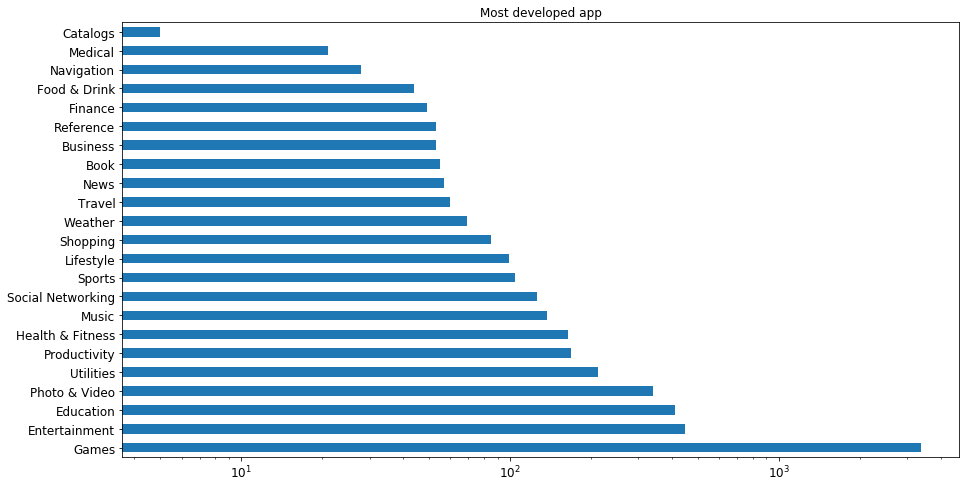

In [71]:
# Checking which Genre of app was most developed

data_Apple['prime_genre'].value_counts().plot(kind='barh', figsize=(15,8),logx=True, title='Most developed app', fontsize=12)

The above shows that Games are the most developed apps followed by Entertainment apps.

In [72]:
data_Apple[['track_name','prime_genre','Popularity']].sort_values(by='Popularity',ascending=False)[:10]

,track_name,prime_genre,Popularity
0,Facebook,Social Networking,10411366.0
1,Instagram,Photo & Video,9727011.0
2,Clash of Clans,Games,9588622.5
3,Temple Run,Games,7760457.0
5,Pinterest,Social Networking,4777308.0
4,Pandora - Music & Radio,Music,4507516.0
6,Bible,Reference,4436640.0
7,Candy Crush Saga,Games,4328073.0
8,Spotify Music,Music,3953533.5
9,Angry Birds,Games,3710029.5


It can be seen that Games dorminates in popularity among the first ten apps, and even though entertainment is the second most developed app it is not among the top ten most popular apps

C:\Users\Klasique Computers\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


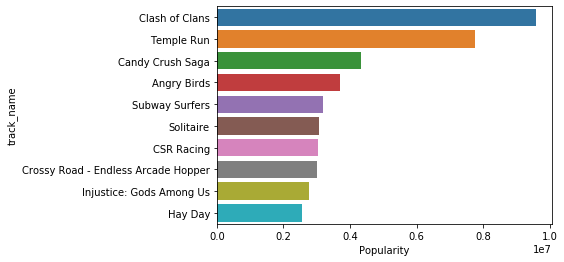

In [73]:
# Top ten popular free apps

pop_free_games = data_Apple[data_Apple['prime_genre'] == 'Games'][data_Apple['price']==0.0][['track_name','Popularity']].sort_values(by='Popularity',ascending=False)[:10]


sns.barplot(x=pop_free_games['Popularity'], y=pop_free_games['track_name'])

It can be inferred from above that the first three free and most popular apps are all games.

## RECOMMENDATIONS FROM APPLE APP ANALYSIS

### My recommendation from the analysis carried out on the apple app store analysis is that in order to generate more revenue from apps, they need apps that have more users engaging with the app and this can be determined from how popular the app is. Hence from the analysis i will recommend more of games apps to be built especially building different versions of "Clash of Clans" games and " Temple run" which are games found as most popular among users. Also, investing in these free apps will get more customers and hence more revenue from ads that will be displayed on these apps.

### ANALYSIS ON GOOGLE PLAY STORE

In [74]:
data_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [75]:
# App with most rating and reviews

data_google[['App','Rating','Reviews']].sort_values(by='Reviews',ascending=False)[:10]

,App,Rating,Reviews
2544,Facebook,4.1,78158306
336,WhatsApp Messenger,4.4,69119316
2545,Instagram,4.5,66577313
335,Messenger – Text and Video Chat for Free,4.0,56642847
1670,Clash of Clans,4.6,44891723
4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526
1654,Subway Surfers,4.5,27722264
3665,YouTube,4.3,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999
1660,Clash Royale,4.6,23133508


It can be seen from the above that the first three apps (social media apps) have the most reviews and rating.

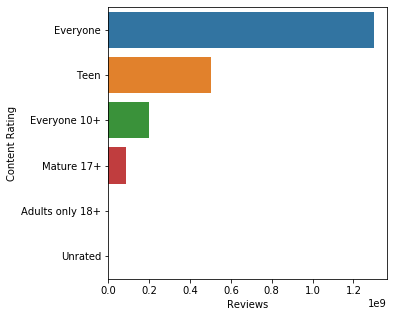

In [76]:
plt.figure(figsize=(5,5))
reviews = data_google.groupby(['Content Rating'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=reviews, y=reviews.index, data=data_google)

This shows everyone gives review generally to all apps

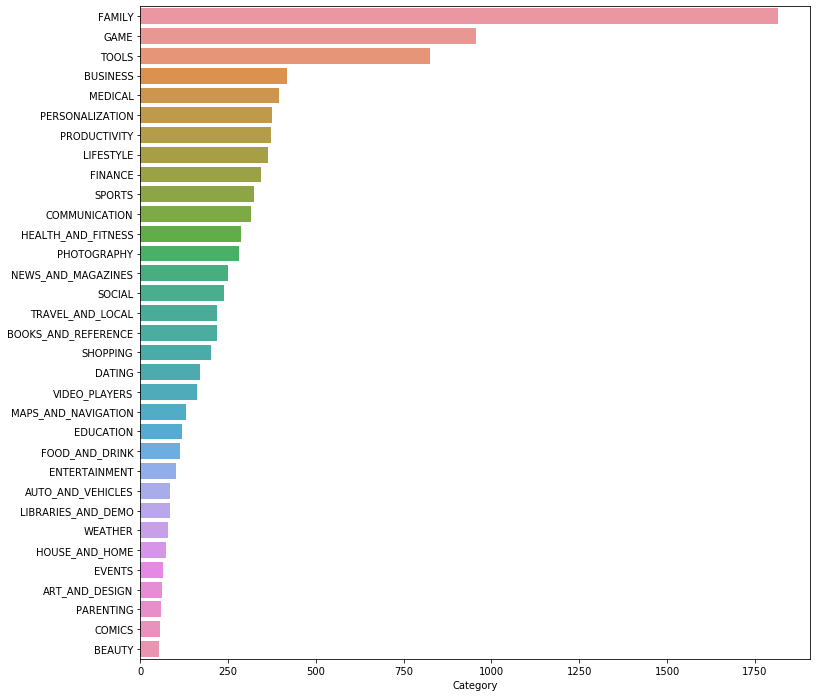

In [77]:
plt.figure(figsize=(12,12))

most_cat = data_google.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=data_google)

Apps that fall under Family category are the most built apps followed by games 

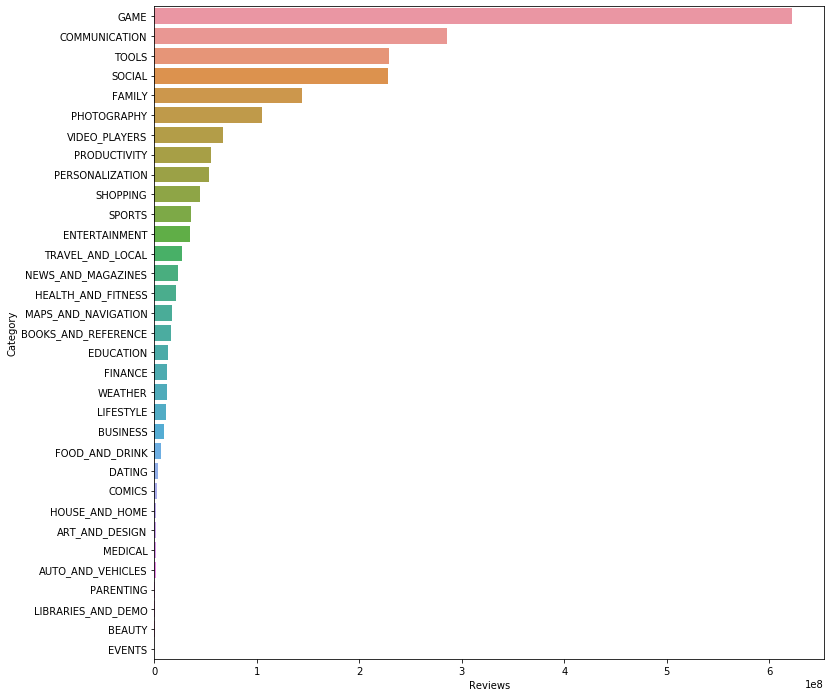

In [78]:
# Total reviews by category

plt.figure(figsize=(12,12))
total_reviews = data_google.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=total_reviews, y=total_reviews.index, data=data_google)

## RECOMMENDATIONS FROM GOOGLE PLAY STORE

### Comparing this to the above, we see again that games app have the highest reviews and hence popularity even though social media tends to have more popularity in terms of just reviews and ratings. But in general Game apps should be built more since they have highest popularity and hence have more usage. This means that more people will get to view the ads displayed on them to generate more revenue for the company.